In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
diabetes = load_diabetes()
#bunch 자료구조 X {ndarray, dataframe}, Y {ndarray, Series}

In [3]:
df_X = diabetes.data
df_y = diabetes.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
learning_rate = 0.5

In [9]:
losses = []
num_interations = 50000
for i in range(num_interations):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 0 : Loss 6023.4229
Iteration 10000 : Loss 2889.1265
Iteration 20000 : Loss 2882.0896
Iteration 30000 : Loss 2877.4597
Iteration 40000 : Loss 2874.4126


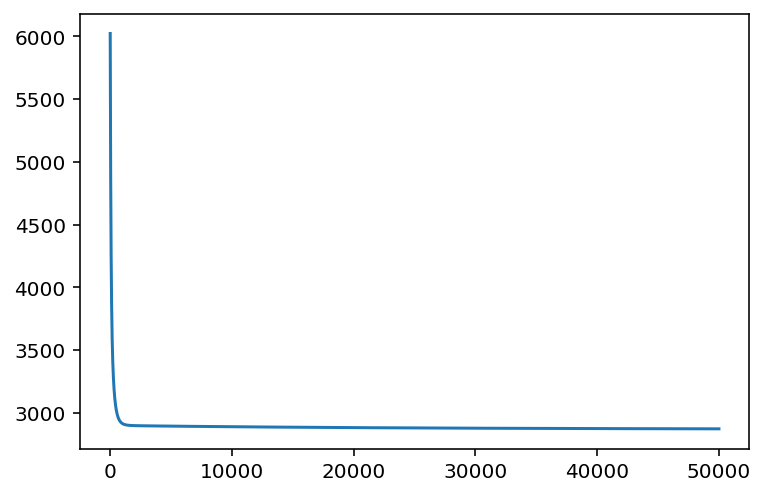

In [10]:
plt.plot(losses)
plt.show()

In [11]:
#학습안한 test 데이터에 대한 loss값 측정
pred = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

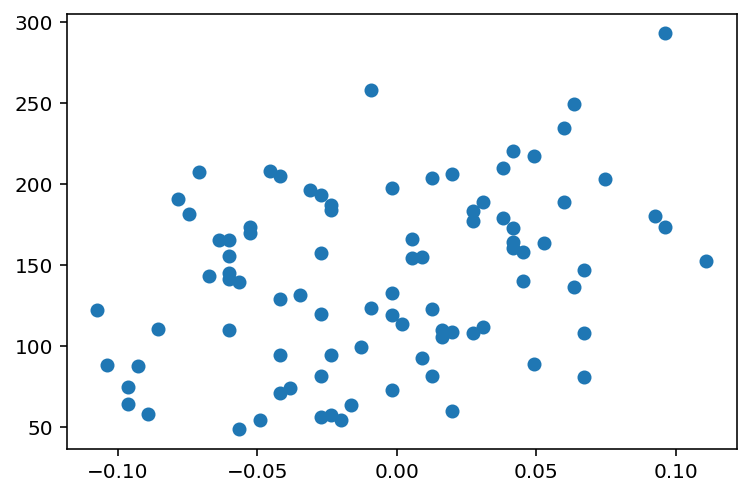

In [12]:
#plt.scatter(X_test[:, 0], y_test) #이건 실제 목표값
plt.scatter(X_test[:, 0], pred) #모델의 예측값
plt.show()